# Homework 3 Question 4  Dual interpretation.
Suppose t ∈ [0, 2π] is a parameter. Consider the following LP:

\begin{equation*}
\begin{aligned}
& \underset{p,q,r,s}{\text{minimize}}
& & p + q + r + s \\
& \text{subject to}:
& & p - r = cos(t) \\
& & & q - s = sin(t) \\
& & & p,q,r,s \ge 0.
\end{aligned}
\end{equation*}

__a) Plot the optimal objective of this LP as a function of t. Can you explain what you see?
Hint: separately consider the cases where cos(t) and sin(t) are positive or negative (four cases).__

In [1]:
using JuMP

tArg = linspace(0,2*pi,1000)
y = zeros(tArg)
idx = 1
for t in tArg
    m = Model()
    @variable(m, p>=0)
    @variable(m, q>=0)
    @variable(m, r>=0)
    @variable(m, s>=0)
    @constraint(m, p-r == cos(t))
    @constraint(m, q-s == sin(t))
    @objective(m, Min, p+r+q+s )
    solve(m)
    y[idx] = getobjectivevalue(m)
    idx+=1
end


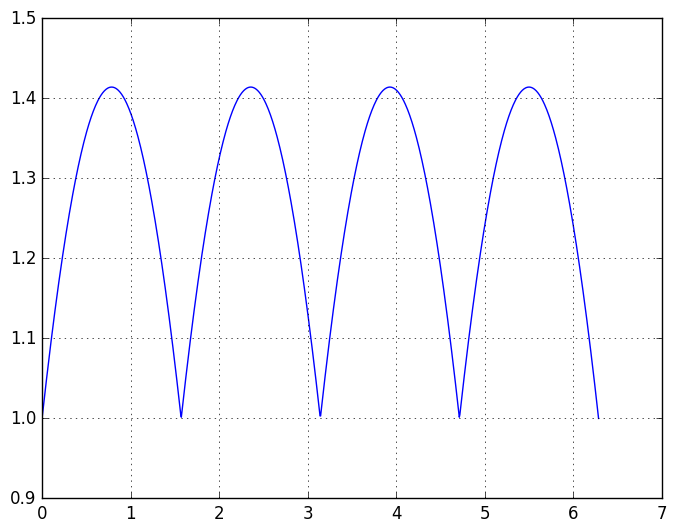

In [2]:
using PyPlot
grid("on")
plot(tArg, y);

The graph above can be explained by considering the four cases of combination of sign of $cos(t)$ and $sin(t)$.

cos(t) | sin(t) | p | q | r | s 
--- | --- | --- | --- | --- | 
 + | + | cos(t) | sin(t) | 0 | 0  
 + | - | cos(t) | 0 | 0 | -sin(t) 
 - | + | 0 | sin(t) | -cos(t) | 0 
 - | - | 0 | 0 | -cos(t) | -sin(t)
 
 In order to minimize the objective of $p+q+r+s$, given constraint $p-r = cos(t)$ and $q-s = sin(t)$, depending on the sign one of the two terms in each equation can be put to zero. More specifically the lower of the two terms in equal to zero in order to minimize the total sum. The other term then becomes equal to $cos(t)$ or $sin(t)$.
 
So the objective value becomes equal to $$|cos(t)| + |sin(t)|$$ after considering the signs of all $p,q,r$ and $s$. Which is also seen through the graph plotted above.

__b) Find the dual LP and interpret it geometrically. Does this agree with the solution of part a)?__

The pair of primal and dual models that correspond to this model is the free form one. Where primal model

\begin{equation*}
\begin{aligned}
& \underset{x}{\text{maximize}}
& & c^{T}x \\
& \text{subject to}:
& & Ax \le b \\
& & & x \ \   free.
\end{aligned}
\end{equation*}

corresponds to dual

\begin{equation*}
\begin{aligned}
& \underset{\lambda}{\text{minimize}}
& & b^{T}\lambda \\
& \text{subject to}:
& & A^{T}\lambda = c \\
& & & \lambda \ge 0.
\end{aligned}
\end{equation*}

In the case above, the model given in the question is of the dual form. We need to convert the dual form to primal one to answer this question.

## Problem Data and Problem Model  

In [3]:
# λ = [p; q; r; s] 
# A, b and c taken from problem given in the question.

b = [1; 1; 1; 1]
A = [1 0 -1 0; 0 1 0 -1]'

tArg = linspace(0,2*pi,1000)
y = zeros(tArg)
idx = 1
for t in tArg
    c = [ cos(t) ; sin(t)]
    
    m = Model();

    @variable(m, x[1:2])   # variable x
    @constraint(m, A*x .<= b)
    @objective(m, Max, dot(c,x))
    
    solve(m)
    y[idx] = getobjectivevalue(m)
    idx+=1
end

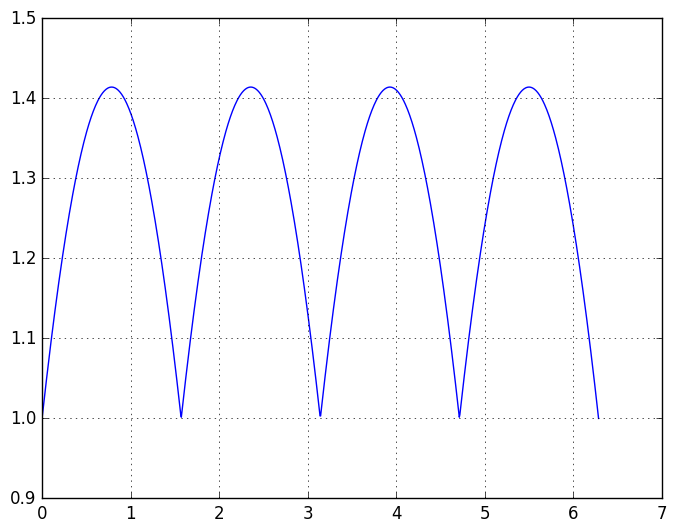

In [4]:
grid("on")
plot(tArg, y);

The graph is exactly the same which is due to strong duality. Thus the solution to part b) corresponds correctly to part a)